In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("../DemoFiles/csv/test-116207.csv")
df

,currentTick,X,Y,Z,velocityX,velocityY,velocityZ,yaw,pitch,utilityDmgDone,...,targetPitch,dmgDone,distToTarget,targetHitArea,penetrated,weaponUsed,targetBlind,targetInSmoke,targetReturnedDmg,Label
0,38304.0,-749.19620,1149.3528,71.837370,-237.116470,15.866859,0.0,209.454350,0.494385,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,38305.0,-751.05115,1149.4930,72.009520,-237.428570,17.950918,0.0,209.657600,0.494385,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,38306.0,-752.90850,1149.6486,72.183640,-237.739780,19.907024,0.0,209.910280,0.494385,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,38307.0,-754.76825,1149.8185,72.359610,-238.048860,21.744265,0.0,210.135500,0.494385,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,38308.0,-756.63040,1150.0018,72.537346,-238.354740,23.471373,0.0,210.338750,0.494385,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47421,449609.0,-1895.07470,818.9592,52.031250,-19.636612,134.269490,0.0,8.646240,359.588000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47422,449610.0,-1895.23400,820.0452,52.031250,-20.389969,139.009960,0.0,8.646240,359.588000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47423,449611.0,-1895.39880,821.1668,52.031250,-21.094574,143.560610,0.0,8.547363,359.522100,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
47424,449612.0,-1895.56870,822.3225,52.031250,-21.743322,147.930440,0.0,8.393555,359.522100,0.0,...,1.884155,12.0,810.1574,2.0,0.0,hkp2000,False,False,0.0,False


## 2) Which body part is targeted [BarChart]

In [56]:
#define	HITGROUP_GENERIC	0
#define	HITGROUP_HEAD		1
#define	HITGROUP_CHEST		2
#define	HITGROUP_STOMACH	3
#define HITGROUP_LEFTARM	4	
#define HITGROUP_RIGHTARM	5
#define HITGROUP_LEFTLEG	6
#define HITGROUP_RIGHTLEG	7
#define HITGROUP_GEAR		10

In [57]:
Unique = np.unique(df["targetHitArea"])

for i in Unique:
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
nan


In [58]:
# Assume Value + 1
hit_area_mapping = {
    1.0: 'GENERIC',
    2.0: 'HEAD',
    3.0: 'CHEST',
    4.0: 'STOMACH',
    5.0: 'LEFTARM',
    6.0: 'RIGHTARM',
    7.0: 'LEFTLEG',
    8.0: 'RIGHTLEG',
    # If you want to handle NaN values
    'nan': 'NaN'
}

# Map the values in the DataFrame to the corresponding categories
df['targetHitArea'] = df['targetHitArea'].map(hit_area_mapping)

# 2) Target Hit Area Bar Chart 

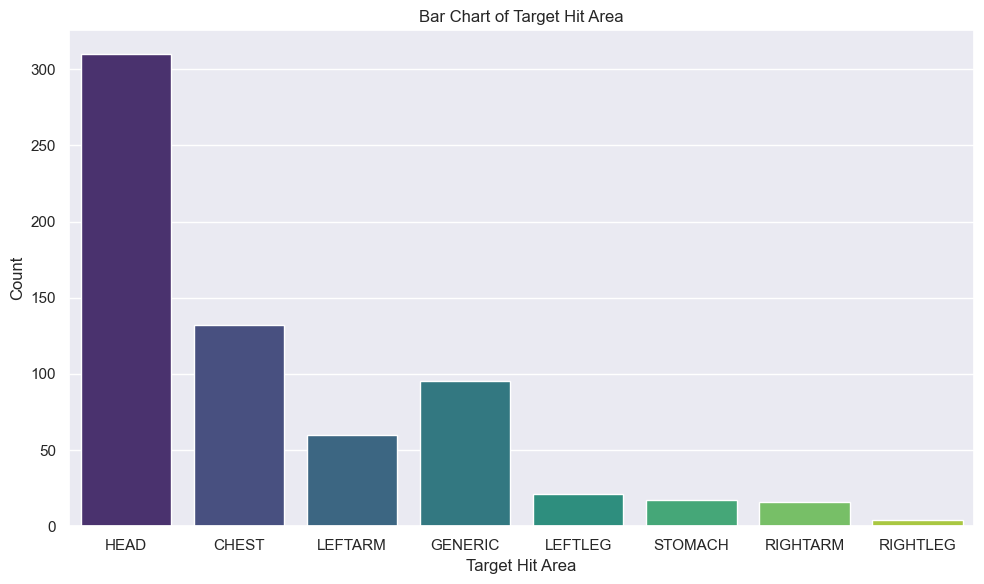

In [59]:
# Set a stylish Seaborn theme
sns.set_theme()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='targetHitArea', data=df, hue='targetHitArea', palette='viridis', dodge=False)
plt.xlabel('Target Hit Area')
plt.ylabel('Count')
plt.title('Bar Chart of Target Hit Area')
plt.tight_layout()  # Adjust layout for better spacing
plt.legend().set_visible(False)  # Hide the legend
plt.show()

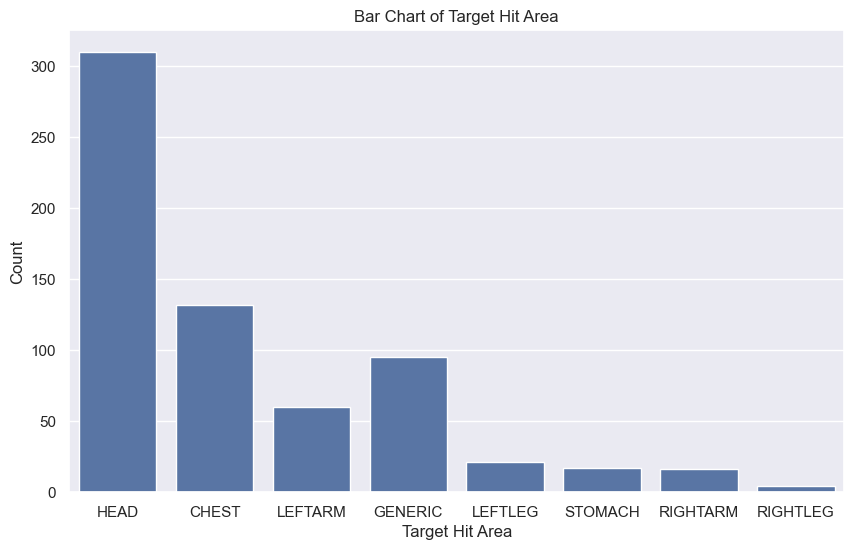

In [60]:
# Without styling

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='targetHitArea', data=df)
plt.xlabel('Target Hit Area')
plt.ylabel('Count')
plt.title('Bar Chart of Target Hit Area')
plt.show()

## 7) Where the players see

In [61]:
columns=df.columns
columns

Index(['currentTick', 'X', 'Y', 'Z', 'velocityX', 'velocityY', 'velocityZ',
       'yaw', 'pitch', 'utilityDmgDone', 'supportUtilityUsed', 'kdr',
       'isCrouched', 'isJumping', 'isFiring', 'targetX', 'targetY', 'targetZ',
       'targetVelocityX', 'targetVelocityY', 'targetVelocityZ', 'tagetYaw',
       'targetPitch', 'dmgDone', 'distToTarget', 'targetHitArea', 'penetrated',
       'weaponUsed', 'targetBlind', 'targetInSmoke', 'targetReturnedDmg',
       'Label'],
      dtype='object')

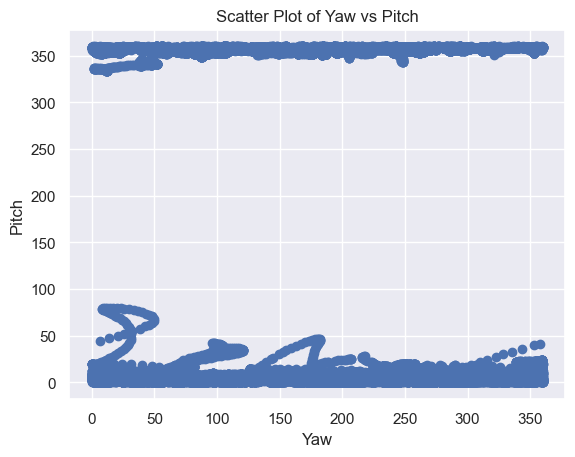

In [62]:
# Assuming your DataFrame is named df
plt.scatter(df['yaw'], df['pitch'])
plt.xlabel('Yaw')
plt.ylabel('Pitch')
plt.title('Scatter Plot of Yaw vs Pitch')
plt.show()